In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


### 1. Match the following characteristics of this dataset: 
- total number of actions
- number of unique users
- sizes of the control and experiment groups (i.e., the number of unique users in each group)

In [ ]:
# total number of actions


In [ ]:
# number of unique users


In [ ]:
# size of control group and experiment group


### 2. How long was the experiment run for? 
Hint: the records in this dataset are ordered by timestamp in increasing order

In [ ]:
# duration of this experiment


### 3. What action types are recorded in this dataset?
(i.e., What are the unique values in the action column?)

In [ ]:
# action types in this experiment


### 4. Why would we use click through rate instead of number of clicks to compare the performances of control and experiment pages?

Answer

### 5. Define the click through rate (CTR) for this experiment.

Answer

### 6. What are the null and alternative hypotheses?
Use $CTR_{old}$ and $CTR_{new}$ in your hypotheses.

$$H_0: $$
$$H_1: $$

# Extra

In [2]:
control_df = df.query('group == "control"')

In [3]:
control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()

In [4]:
control_ctr

0.2797118847539016

In [5]:
experiment_df = df.query('group == "experiment"')
experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()

In [6]:
experiment_ctr

0.3097463284379172

In [8]:
obs_diff = experiment_ctr - control_ctr
obs_diff

0.030034443684015644

In [2]:
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0], replace = True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)

(array([  10.,  115.,  561., 1688., 2750., 2803., 1481.,  503.,   79.,
          10.]),
 array([-0.01448752, -0.00543451,  0.00361851,  0.01267153,  0.02172454,
         0.03077756,  0.03983058,  0.0488836 ,  0.05793661,  0.06698963,
         0.07604265]),
 <a list of 10 Patch objects>)

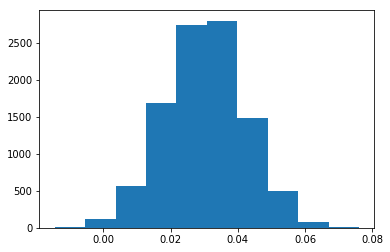

In [3]:
plt.hist(diffs)